Hash Table

In [12]:
from math import log2,floor,ceil
#python's dictionaries provide a good structure for the table of a simple geographic hash
class HashTable():
    table = {}
    def factorby2(self,n):
        if n//2==0:
            if n%2==0:
                return tuple([])
            else:
                return tuple([n%2])
        else:
            return self.factorby2(n//2)+tuple([n%2])
    def fn(self,n,size):
        #print("log2(n)\n\t",log2(n))
        #print("\tfloor: ",floor(log2(n)))
        #print("\tceil: ",ceil(log2(n)))
        dif = ceil(log2(size))-ceil(log2(n))
        ret = tuple([0])*dif
        #print("\tdif: ",dif)
        #print("\tret: ",ret)
        return ret
    #Standard indexes of the table are :(0,0)(0,1)(1,0)(1,1)
    #Eventually will turn the size dinamic
    def __init__(self,size = 4):
        #print("===size===")
        #self.fn(size)
        for n in range(size):
            #print("==="+str(n+1)+"===")
            #self.fn(n+1,size)
            #==================================
            #Filling the table with Stacks
            self.table[self.fn(n+1,size)+self.factorby2(n)] = []
            #====================================
    def getIndexes(self):
        return self.table.keys()
    def criteria(self,key, id):
        keylen = len(key)
        idlen = len(id)
        sublen = idlen-keylen
        return (id[sublen::]==(key))

    def insert(self,elem, getid):
        # print("getid(): ",getid)
        # print("getid(elem): ",getid(elem))
        keys = self.table.keys()
        id = getid(elem)
        for key in keys:
            if self.criteria(key, id):
                index = self.findPlace(self.table[key], id, getid)
                self.table[key].insert(index,elem)
    #Returns index starting in 0
    def findPlace(self,list, id, getid):
        if not list or list==[] :
            return 0
        for i in range(len(list)):
            if len(getid(list[i])) < len(id):
                return i
        return len(list)

    def findLeaf(self, hash_code, id):
        for node in self.table[hash_code]:
            nodeidlen = len(node.mor_code)
            subid = id[len(id)-nodeidlen::]
            if(cmp(subid,node.mor_code)==0):
                return node
        return None

#if __name__ == "__main__":
#
#    
#    def criteriaTest(keys,ids):
#        for id in ids:
#            for key in keys:
#                print("id : ",id)
#                print("/==================")
#                print("\tkey : ",key)
#                print("\tcriteria : ",HashTable.criteria(key, id))
#                print("==================/\n\n")
#    table = HashTable()
#    inds = table.getIndexes()
#    print(inds)
#    elems = [(0,0,0),(1,0,0,1),(1,),(1,0,1),(0,0,1,0),(1,0),(0,1,1),(0,0,1,0),(1,1)]
#    #criteriaTest(table.getIndexes(),elems)
#    table.insert(elems,lambda x: x)
#    for ind in inds:
#        print(ind,": ",table.table[ind])

teste_quadtree

In [14]:
class Node():
    ROOT = 0
    BRANCH = 1
    LEAF = 2
    minsize = 1   # Set by QuadTree
    #_______________________________________________________
    # In the case of a root node "parent" will be None. The
    # "rect" lists the minx,minz,maxx,maxz of the rectangle
    # represented by the node.
    def __init__(self, parent, rect, quadrant = ()):
        self.parent = parent
        self.children = [None,None,None,None]
        if parent == None:
            self.depth = 0
            self.mor_code = tuple([1])
        else:
            self.depth = parent.depth + 1
            self.mor_code = parent.mor_code+quadrant
        self.rect = rect
        x0,z0,x1,z1 = rect.twoPoints()
        if self.parent == None:
            self.type = Node.ROOT
        elif (x1 - x0) <= Node.minsize:
            self.type = Node.LEAF
        else:
            self.type = Node.BRANCH
        print(self.mor_code)
    #_______________________________________________________
    # Recursively subdivides a rectangle. Division occurs 
    # ONLY if the rectangle spans a "feature of interest".
    def subdivide(self):
        if self.type == Node.LEAF:
            return
        rects = self.rect.subdivide()
        # x0,z0,x1,z1 = self.rect
        # h = (x1 - x0)/2
        # rects = []
        # rects.append( (x0, z0, x0 + h, z0 + h) ) #00
        # rects.append( (x0 + h, z0, x1, z0 + h) ) #01
        # rects.append( (x0, z0 + h, x0 + h, z1) ) #10
        # rects.append( (x0 + h, z0 + h, x1, z1) ) #11
        for n in range(len(rects)):
            span = self.spans_feature(rects[n])
            if span == True:
                #esse pedaço de código realmente me incomoda, estou tratando tudo como se fosse para utilizar z-order
                quadrant = (n//2,n%2)
                print("\t"),
                self.children[n] = self.getinstance(rects[n],quadrant)#Quadrant
                self.children[n].subdivide() # << recursion
    #_______________________________________________________
    # A utility proc that returns True if the coordinates of
    # a point are within the bounding box of the node.
    def contains(self, x, z):
        x0,z0,x1,z1 = self.rect
        if x >= x0 and x <= x1 and z >= z0 and z <= z1:
            return True
        return False
    #_______________________________________________________
    # Sub-classes must override these two methods.
    def getinstance(self,rect,quadrant):
        return Node(self,rect,quadrant)			
    def spans_feature(self, rect):
        return rect.spans_feature()

#===========================================================			
class QuadTree():
    maxdepth = 1 # the "depth" of the tree
    leaves = []
    allnodes = []
    #_______________________________________________________
    def __init__(self, rootnode, minrect):
        Node.minsize = minrect
        self.hash_table = HashTable()
        rootnode.subdivide() # constructs the network of nodes
        self.prune(rootnode)
        self.traverse(rootnode)
    #_______________________________________________________
    # Sets children of 'node' to None if they do not have any
    # LEAF nodes.		
    def prune(self, node):
        if node.type == Node.LEAF:
            return 1
        leafcount = 0
        removals = []
        for child in node.children:
            if child != None:
                leafcount += self.prune(child)
                if leafcount == 0:
                    removals.append(child)
        for item in removals:
            n = node.children.index(item)
            node.children[n] = None		
        return leafcount
    #_______________________________________________________
    # Appends all nodes to a "generic" list, but only LEAF 
    # nodes are appended to the list of leaves.
    def traverse(self, node):
        #QuadTree.allnodes.append(node)
        self.hash_table.insert(node,lambda x: x.mor_code)
        if node.type == Node.LEAF:
            #QuadTree.leaves.append(node)
            if node.depth > QuadTree.maxdepth:
                QuadTree.maxdepth = node.depth
        for child in node.children:
            if child != None:
                self.traverse(child) # << recursion
    #_______________________________________________________
    #Point to leaf
    def pointToLeaf(self,point):
        x,y = point.getCoord()
        x0,y0,x1,y1 = self.rect
        assert x>=0 and x<=x1 and y>=y0 and y<=y1,"Given point not in this rect"
        hash_code = (y%2,x%2)
        xt = HashTable.factorby2(x)
        yt = HashTable.factorby2(y)
        dif = len(xt)-len(yt)
        id = ()
        if dif<0:
            for i in range(-dif):
                xt = (0,)+xt
        elif dif>0:
            for i in range(dif):
                yt = (0,)+yt
        assert len(xt)-len(yt)==0,"=========FALT=========\nin QuadTree.pointToLeaf()\n\t, len(xt)-len(yt) != 0"

        for i in range(len(xt)):
            xti = xt[i]
            yti = yt[i]
            id = di+(yti,xti)
        node = self.hash_table.findLeaf(hash_code,id)
        assert node==None,"Could not find suitable node for given point"
        return node
#===========================================================

#===========================================================.
#
#if __name__ == "__main__":
#
#    print ("Hello World!")
#    qt = QuadTree(Node(None,(0,0,1,1)),0.1)
#    print(Node.minsize)
#    print(qt.maxdepth,qt.leaves)

Rect Space

In [8]:
from copy import deepcopy
class Point2D():
    def __init__(self, coordinates=(0.0,0.0)):
        self.x = coordinates[0]
        self.y = coordinates[1]
    def getCoord(self):
        return (self.x,self.y)

class RectSpace():
    elements = []
    #==================================
    #Confirma se está no espaço
    def isinRange(self,point):
        bound = self.getBounds()
        print("Bound: ",bound)
        x = point.getCoord()[0]
        y = point.getCoord()[1]
        return(((x>=bound[0][0])\
                and(x<=bound[0][1]))\
            and((y>=bound[1][0])\
                and(y<=bound[1][1])))

    #==================================
    #Assegura a iclusão se pontos que pertençam ao espaço
    def receivePoints(self,elems):
        print("-----------------------------------------")
        print("\tIn rect: x : "+str(self.getBounds()[0])+"; y : "+str(self.getBounds()[1]))
        for elem in elems:
            if self.isinRange(elem):
                self.elements.append(elem)
                print("Point: "+str(elem.getCoord())+"was appended")
            else:
                print("Point: "+str(elem.getCoord())+"was NOT appended")
        print("----------------------------------------")	
    #==================================
    #Devolve ((x0,xf),(y0,yf))
    def getBounds(self):
        return((self.origin.getCoord()[0],\
                    self.origin.getCoord()[0]+self.Width),\
            (self.origin.getCoord()[1],\
                    self.origin.getCoord()[1]+self.Height))

    #==================================
    def __init__(self,elements=[],origin=Point2D((0.0,0.0)),size=(800.0,600.0)):
        # print("Origin = ",origin)
        # print("origin getCoord() = ",origin.getCoord())
        self.origin = origin
        # print("self.Origin = ",self.origin)
        # print("self.origin getCoord() = ",self.origin.getCoord())

        self.Width = size[0]
        self.Height = size[1]
        self.receivePoints(elements)
    def twoPoints(self):
        origin = self.origin.getCoord()
        final = (origin[0]+self.Width,origin[1]+self.Height)
        return origin+final
    def isinThisRange(self,elems,origin,bounds):
        x0,y0 = origin.getCoord()
        x1 = x0+bounds[0]
        y1 = y0+bounds[1]
        for elem in elems:
            x,y = elem.getCoord()
            if (((x>=x0)and(x<=x1))and((y>=y0)and(y<=y1))):
                return True
        return False

    def subRect(self,elements, origin,subwidht,subheight):
        elemcopy = deepcopy(elements)
        # print("=====IN subRect=====\n")
        # print("Origin = ",origin)
        # print("origin getCoord() = ",origin.getCoord())
        origincopy = deepcopy(origin)
        # print("origincopy = ",origincopy)
        # print("origincopy.getCoord() = ",origincopy.getCoord())
        # print("==============================")
        subrect = RectSpace(elemcopy,origincopy,(subwidht,subheight))
        return subrect

    def subdivide(self):
        sub = []
        subwidht = self.Width/2
        subheight = self.Height/2
        # print("=====IN subdivide=====\n")
        # print("self.Origin = ",self.origin)
        # print("self.origin getCoord() = ",self.origin.getCoord())

        # print("origincopy = ",origincopy)
        # print("origincopy.getCoord() = ",origincopy.getCoord())
        # print("==============================")

        if self.isinThisRange(self.elements,self.origin,(subwidht,subheight)):
            # print("self.Origin = ",self.origin)
            # print("self.origin getCoord() = ",self.origin.getCoord())
            subrect = self.subRect(self.elements,self.origin,subwidht,subheight)
            sub.append(deepcopy(subrect))

        if self.isinThisRange(self.elements,Point2D((self.origin.getCoord()[0]+subwidht,self.origin.getCoord()[1])),(subwidht,subheight)):
            subrect = self.subRect(self.elements,Point2D((self.origin.getCoord()[0]+subwidht,self.origin.getCoord()[1])),subwidht,subheight)
            sub.append(deepcopy(subrect))

        if self.isinThisRange(self.elements,Point2D((self.origin.getCoord()[0],self.origin.getCoord()[1]+subheight)),(subwidht,subheight)):
            subrect = self.subRect(self.elements,Point2D((self.origin.getCoord()[0],self.origin.getCoord()[1]+subheight)),subwidht,subheight)
            sub.append(deepcopy(subrect))

        if self.isinThisRange(self.elements,Point2D((self.origin.getCoord()[0]+subwidht,self.origin.getCoord()[1]+subheight)),(subwidht,subheight)):
            subrect = self.subRect(self.elements,Point2D((self.origin.getCoord()[0]+subwidht,self.origin.getCoord()[1]+subheight)),subwidht,subheight)
            sub.append(deepcopy(subrect))

        return sub

    def spans_feature(self):
        return not(self.elements==[])



#def testePoint2D(mode="empty",coordinates = (0.0,0.0)):
#    if mode=="empty":
#        p1 = Point2D()
#    elif mode == "full":
#        p1 = Point2D(coordinates)
#    print("testePoint2D mode: "+mode)
#    print("(x,y) = "+str(p1.getCoord()))
#    print("\t"+"x = "+str(p1.x))
#    print("\t"+"y = "+str(p1.y))



#def testeRectSpace(mode="empty",elements = [Point2D((300.0,225.0))],origin = (200.0,150.0),size = (400.0,300.0)):
#    if mode=="empty":
#        r1 = RectSpace()
#    elif mode=="full":
#        r1 = RectSpace(elements,Point2D(origin),size)
#    print("testeRectSpace mode: "+mode)
#    print("\t"+"origin = "+str(r1.origin.getCoord()))
#    print("\t"+"Width = "+str(r1.Width))
#    print("\t"+"Height = "+str(r1.Height))


#if __name__ == "__main__":#
#    print("Hello World!")
#    #=========================================================
#    std_Coord = (100.0,50.0)
#    testePoint2D()
#    testePoint2D("full")
#    testePoint2D("full",std_Coord)
#    #=========================================================
#    std_origin = (20.0,15.0)
#    std_size = (200.0,150.0)
#    #Ultimo ponto não deve entrar
#    std_elements = [Point2D(std_origin),
#        Point2D(((std_origin[0]+std_size[0])/2,(std_origin[1]+std_size[1])/2)),
#        Point2D(std_size),
#        Point2D(((std_origin[0]+std_size[0]),(std_origin[1]+std_size[1]))),
#        Point2D((std_origin[0]+std_size[0]+1,std_origin[1]+std_size[1]+1)),
#        Point2D((std_origin[0]+std_size[0]+10,std_origin[1]+std_size[1]+10))
#    ]
#    testeRectSpace()
#    testeRectSpace("full")
#    testeRectSpace("full",std_elements,std_origin,std_size)

Teste_trabalho

==Bem vindo ao teste de quadtrees!==
    
1. Usar retangulo padrao(800,600)    
2. Definir o proprio retangulo    
99. Sair    
-->1
Quantos pontos devo gerar? 2

	origem:  <__main__.Point2D object at 0x00000200A2E00CF8> 
-----------------------------------------
	In rect: x : (0, 800); y : (0, 600)
Bound:  ((0, 800), (0, 600))
Point: (266, 76)was appended
Bound:  ((0, 800), (0, 600))
Point: (54, 164)was appended
----------------------------------------
(1,)
Qual o tamanho da menor largura? 200
-----------------------------------------
	In rect: x : (0, 400.0); y : (0, 300.0)
Bound:  ((0, 400.0), (0, 300.0))
Point: (266, 76)was appended
Bound:  ((0, 400.0), (0, 300.0))
Point: (54, 164)was appended
----------------------------------------
	
(1, 0, 0)
-----------------------------------------
	In rect: x : (200.0, 400.0); y : (0, 150.0)
Bound:  ((200.0, 400.0), (0, 150.0))
Point: (266, 76)was appended
Bound:  ((200.0, 400.0), (0, 150.0))
Point: (54, 164)was NOT appended
Bound:  ((200.0, 

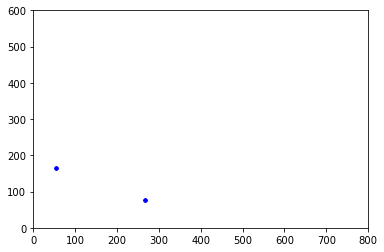

In [16]:

from random import randrange
import sys
def perguntaRect():
    largura = int(input("me informe uma largura: "))
    altura = int(input("e me informe uma altura: "))
    return (largura,altura)
def iniciaRetangulo(dimensoes=(800,600)):
    ptslist = criaPontos((0,0)+dimensoes)
    origem = Point2D((0,0))
    print("\n==========\n\torigem: ",origem,"\n==========")
    rect = RectSpace(ptslist,origem,dimensoes)
    return rect
def criaPontos(bounds):
    qtd_points = int(input("Quantos pontos devo gerar? "))
    pointlist = []
    for i in range(qtd_points):
        pointlist.append(Point2D((randrange(bounds[0],bounds[2]),randrange(bounds[1],bounds[3]))))
    return pointlist
def iniciaQuadTree(rect):
    rootnode = Node(None,rect)
    minsize = int(input("Qual o tamanho da menor largura? "))
    quadTree = QuadTree(rootnode, minsize)
    # print("\nIn iniciaQuadTree(); quadtree==None :",quadTree==None,"\n")
    return quadTree

def mainMenu():
    command = int(input("==Bem vindo ao teste de quadtrees!==\n\
    \n1. Usar retangulo padrao(800,600)\
    \n2. Definir o proprio retangulo\
    \n99. Sair\
    \n-->"))

    if command==1:
        rect = iniciaRetangulo()
        return iniciaQuadTree(rect),rect.elements
    #Isso está comentado pois não implementei plt.axis() para um tamanho dinâmico
    # elif command==2:
        # print("Entao"),
        # dimensoes = perguntaRect()
        # rect = iniciaRetangulo(dimensoes)
        # return iniciaQuadTree(rect),rect.elements
    elif command==99:
        input("Ate mais!\naperte \"enter\" para terminar")
        sys.exit()
    else:
        print("Opção não existe!")
        return mainMenu()

import matplotlib 
import matplotlib.pylab as plt

%matplotlib inline

quadTree,points = mainMenu()
if quadTree==None:
    input("Não foi gerada quadtree\npressione \"enter\" para terminar")
    sys.exit()
if points == None or points == []:
    intput("Não foi gerada lista de pontos\npressione \"enter\" para terminar")
    sys.exit()
for point in points :
    plt.plot([point.getCoord()[0]],[point.getCoord()[1]],'b.')
plt.axis([0,800,0,600])
plt.show()
